In [1]:
import pandas as pd
import numpy as np
import requests

In [2]:
data = pd.read_csv("merge_three.csv")

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (34,40,42) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
# from google.colab import files
# import io
# import pandas as pd
# uploaded = files.upload()
# data = pd.read_csv(io.BytesIO(uploaded['merge_three.csv']))

In [4]:
data.columns

Index(['Unnamed: 0', 'dt', 'dt_iso', 'timezone', 'city_name', 'lat', 'lon',
       'temp', 'feels_like', 'temp_min', 'temp_max', 'pressure', 'sea_level',
       'grnd_level', 'humidity', 'wind_speed', 'wind_deg', 'rain_1h',
       'rain_3h', 'snow_1h', 'snow_3h', 'clouds_all', 'weather_id',
       'weather_main', 'weather_description', 'weather_icon', 'ts', 'street',
       'level', 'Unnamed: 0.1', 'Accident Number', 'Citation Number',
       'Citation Issued', 'Accident Date Time', 'Unit Type', 'Vehicle Type',
       'Age of At Fault Person', 'Race of At Fault Person',
       'Gender of At Fault Person', 'Ethnicity of At Fault Person',
       'Driver Action', 'Driver Contributing Factor', 'First Harmful Event',
       'Zone Sector', 'Involved Injury', 'Number Injured', 'Involved Death',
       'Number Killed', 'Motorcycle Involved', 'Motorcycle At Fault',
       'Bicycle Involved', 'Bicycle At Fault', 'Pedestrian Involved',
       'Pedestrian At Fault', 'Crash Location', 'City', 'Zip 

In [5]:
df = data.copy()

In [6]:
# Drop these columns
df.drop(columns=['Unnamed: 0','Unnamed: 0.1', 'dt','timezone', 'city_name','rain_1h',
       'rain_3h', 'snow_1h', 'snow_3h', 'clouds_all', 'weather_id', 'feels_like', 
       'temp_min', 'temp_max','Accident Number', 'Citation Number', 'weather_description', 
       'weather_icon','Citation Issued', 'Accident Date Time', 'Unit Type', 'Vehicle Type',
       'Age of At Fault Person', 'Race of At Fault Person',
       'Gender of At Fault Person', 'Ethnicity of At Fault Person',
       'Driver Action', 'Driver Contributing Factor', 'First Harmful Event',
       'Zone Sector', 'Involved Injury', 'Number Injured', 'Involved Death',
       'Number Killed', 'Motorcycle Involved', 'Motorcycle At Fault',
       'Bicycle Involved', 'Bicycle At Fault', 'Pedestrian Involved',
       'Pedestrian At Fault','City', 'Zip Code', 'ts', 'Patrol Division', 
       'Accident Round to 30min', 'sea_level','grnd_level','Crash Location',
       'Location Point', 'Patrol Division', 'road1', 'road2', 'relevant_new',
       'road1_in', 'road2_in','lat','lon'], inplace=True)

In [7]:
df

,dt_iso,temp,pressure,humidity,wind_speed,wind_deg,weather_main,street,level,crash_label
0,2019-04-22 08:00:00,280.02,1017,81,1.34,184,Clear,Fontaine Blvd,2,0.0
1,2019-04-22 13:00:00,279.61,1021,87,0.45,9,Clouds,Mesa Ridge Pkwy,3,0.0
2,2019-04-22 13:00:00,279.61,1021,87,0.45,9,Clouds,E Ohio Ave,3,0.0
3,2019-04-22 13:00:00,279.61,1021,87,0.45,9,Clouds,S Nevada Ave,3,0.0
4,2019-04-22 13:00:00,279.61,1021,87,0.45,9,Clouds,E Ohio Ave,4,0.0
...,...,...,...,...,...,...,...,...,...,...
44606,2021-10-29 23:00:00,289.76,1019,28,0.45,239,Clear,S Nevada Ave,4,0.0
44607,2021-10-29 23:00:00,289.76,1019,28,0.45,239,Clear,S Nevada Ave,2,0.0
44608,2021-10-29 23:00:00,289.76,1019,28,0.45,239,Clear,S Nevada Ave,3,0.0
44609,2021-10-29 23:00:00,289.76,1019,28,0.45,239,Clear,Fontaine Blvd,3,0.0


In [8]:
# Relevant Roads
roads = ['S ACADEMY BLVD', 'SH-115','E LAS VEGAS ST', 'I-25', 'VENETUCCI BLVD', \
         'LAKE AVE', 'S NEVADA AVE', 'Bandley Dr', 'N Santa Fe Ave', \
         'FOUNTAIN MESA RD', 'E MESA RIDGE PKWY', 'MESA RIDGE PKWY', 'E OHIO AVE',\
         'FONTAINE BLVD', 'CHARTER OAK RANCH RD', 'MAGRATH AVE', 'BARKELEY AVE', \
         'WESTMEADOW DR', 'CHILES AVE', 'BROADMOOR BLUFFS DR', 'NORAD RD', 'NELSON BLVD']

In [9]:
df['dt_iso'] = pd.to_datetime(df['dt_iso'])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44611 entries, 0 to 44610
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   dt_iso        44611 non-null  datetime64[ns]
 1   temp          44611 non-null  float64       
 2   pressure      44611 non-null  int64         
 3   humidity      44611 non-null  int64         
 4   wind_speed    44611 non-null  float64       
 5   wind_deg      44611 non-null  int64         
 6   weather_main  44611 non-null  object        
 7   street        44611 non-null  object        
 8   level         44611 non-null  int64         
 9   crash_label   44611 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(4), object(2)
memory usage: 3.4+ MB


In [11]:
from datetime import datetime as dt
df['month'] = df['dt_iso'].dt.month
df['week of the year'] = df['dt_iso'].dt.week
df['day of the week'] = df['dt_iso'].dt.weekday
df['day of the month'] = df['dt_iso'].dt.day
df['hour of the day'] = df['dt_iso'].dt.hour

<ipython-input-11-8584287f101d>:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df['week of the year'] = df['dt_iso'].dt.week


In [12]:
df['weather_main'].unique()

array(['Clear', 'Clouds', 'Drizzle', 'Rain', 'Mist', 'Snow', 'Fog',
       'Thunderstorm', 'Squall', 'Haze', 'Smoke', 'Dust'], dtype=object)

In [13]:
df.columns

Index(['dt_iso', 'temp', 'pressure', 'humidity', 'wind_speed', 'wind_deg',
       'weather_main', 'street', 'level', 'crash_label', 'month',
       'week of the year', 'day of the week', 'day of the month',
       'hour of the day'],
      dtype='object')

In [14]:
X = df[['temp', 'pressure', 'humidity', 'wind_speed', 'wind_deg',
       'weather_main', 'street', 'level', 'month',
       'week of the year', 'day of the week', 'day of the month',
       'hour of the day']]

In [15]:
Y = df['crash_label']

In [16]:
from sklearn.preprocessing import LabelEncoder
lew = LabelEncoder()
le = LabelEncoder()
X['weather_main'] = lew.fit_transform(X['weather_main'])

<ipython-input-16-a4dcd3715af0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['weather_main'] = lew.fit_transform(X['weather_main'])


In [17]:
X['street'] = le.fit_transform(X['street'])

<ipython-input-17-3d4157d3d431>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['street'] = le.fit_transform(X['street'])


In [18]:
X

,temp,pressure,humidity,wind_speed,wind_deg,weather_main,street,level,month,week of the year,day of the week,day of the month,hour of the day
0,280.02,1017,81,1.34,184,0,6,2,4,17,0,22,8
1,279.61,1021,87,0.45,9,1,10,3,4,17,0,22,13
2,279.61,1021,87,0.45,9,1,5,3,4,17,0,22,13
3,279.61,1021,87,0.45,9,1,14,3,4,17,0,22,13
4,279.61,1021,87,0.45,9,1,5,4,4,17,0,22,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...
44606,289.76,1019,28,0.45,239,0,14,4,10,43,4,29,23
44607,289.76,1019,28,0.45,239,0,14,2,10,43,4,29,23
44608,289.76,1019,28,0.45,239,0,14,3,10,43,4,29,23
44609,289.76,1019,28,0.45,239,0,6,3,10,43,4,29,23


In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
depth_list = [5,10,15,20,25]
f1_score_test = []
f1_score_train = []
for dp in depth_list:
  clf = DecisionTreeClassifier(random_state=0,max_depth = dp)
  clf.fit(X_train,y_train)
  ytrain_pred = clf.predict(X_train)
  ytest_pred = clf.predict(X_test)
  f1_score_test.append(f1_score(y_test, ytest_pred))
  f1_score_train.append(f1_score(y_train, ytrain_pred))

In [21]:
f1_score_test

[0.0, 0.20100502512562812, 0.39999999999999997, 0.58125, 0.6476761619190405]

In [22]:
f1_score_train

[0.0,
 0.301143583227446,
 0.6603396603396604,
 0.9014432989690722,
 0.9957446808510639]

In [23]:
from sklearn.metrics import f1_score
f1_score(y_test, ytest_pred)

0.6476761619190405

In [24]:
f1_score(y_train, ytrain_pred)

0.9957446808510639

In [25]:
#Using SMOTE to handle class imblance

from imblearn.over_sampling import SMOTE
from collections import Counter

In [26]:
Counter(Y)

Counter({0.0: 42991, 1.0: 1620})

In [27]:
# transform the dataset
oversample = SMOTE()
X, Y = oversample.fit_resample(X, Y)

In [28]:
Counter(Y)

Counter({0.0: 42991, 1.0: 42991})

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [74]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0,max_depth = 8)
clf.fit(X_train,y_train)
ytrain_pred = clf.predict(X_train)
ytest_pred = clf.predict(X_test)

In [75]:
clf.predict_proba(X_train)

array([[0.67577236, 0.32422764],
       [1.        , 0.        ],
       [1.        , 0.        ],
       ...,
       [0.07853173, 0.92146827],
       [1.        , 0.        ],
       [0.99686127, 0.00313873]])

In [76]:
f1_score(y_test, ytest_pred)

0.8649888143176734

In [77]:
f1_score(y_train, ytrain_pred)

0.8693598508390303

In [78]:
import pickle

#Saving the trained model

with open('trained_model.pkl','wb') as f:
  pickle.dump(clf,f)

In [79]:
importances = clf.feature_importances_
feature_imp = dict()
for i,v in enumerate(importances):
	feature_imp[clf.feature_names_in_[i]] = v
	print('Feature: '+clf.feature_names_in_[i]+'\t\t\tScore: '+str(v))

Feature: temp			Score: 0.015786580172167324
Feature: pressure			Score: 0.015039412953764581
Feature: humidity			Score: 0.014785593568743233
Feature: wind_speed			Score: 0.017003466830086265
Feature: wind_deg			Score: 0.035696096435839396
Feature: weather_main			Score: 0.002523719855989576
Feature: street			Score: 0.684128277838783
Feature: level			Score: 0.02929573710758759
Feature: month			Score: 0.0
Feature: week of the year			Score: 0.007174655738315543
Feature: day of the week			Score: 0.032324589813195734
Feature: day of the month			Score: 0.013431288150431049
Feature: hour of the day			Score: 0.13281058153509673


In [80]:
sorted_imp = sorted(feature_imp.items(), key=lambda x:x[1], reverse = True)

In [81]:
sorted_imp_dict = dict(sorted_imp)

In [38]:
import matplotlib.pyplot as plt

rcParams['figure.figsize'] = (10, 10)
plt.bar(x = sorted_imp_dict.keys(), height = sorted_imp_dict.values())
plt.xticks(rotation = 90)

NameError: ignored

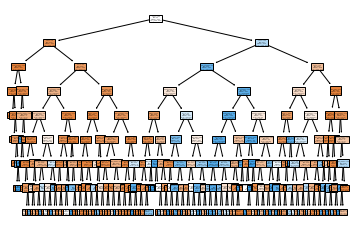

In [39]:
from matplotlib import rcParams # figure size
from termcolor import colored as cl # text customization
from sklearn import tree

#rcParams['figure.figsize'] = (50, 20)

tree.plot_tree(clf,feature_names = clf.feature_names_in_, 
          class_names = np.array(['crash','no crash']), 
          filled = True)

plt.savefig('tree_visualization.png')

In [40]:
new_record = np.array([275,1022,85,3.34,324,0,6,2,4,17,0,22,8])

In [41]:
new_record = new_record.reshape(1,-1)

In [42]:
aa = clf.predict_proba(new_record)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [73]:
clf.predict(new_record)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0.])

In [43]:
aa

array([[1., 0.]])

In [63]:
aa[0][1]

0.0

In [44]:
le.transform(['Fontaine Blvd'])

array([6])

In [45]:
lew.transform(['Snow'])

array([9])

In [46]:
le.inverse_transform([6])

array(['Fontaine Blvd'], dtype=object)

In [47]:
lew.inverse_transform([1])

array(['Clouds'], dtype=object)

In [48]:
X['street'].unique()

array([ 6, 10,  5, 14, 13, 15,  8, 12,  4,  0,  9,  7,  3, 11,  1, 16,  2,
       17])

In [49]:
df['street'].unique()

array(['Fontaine Blvd', 'Mesa Ridge Pkwy', 'E Ohio Ave', 'S Nevada Ave',
       'S Academy Blvd', 'SH-115', 'Lake Ave', 'Norad Rd',
       'E Las Vegas St', 'Barkeley Ave', 'Magrath Ave',
       'Fountain Mesa Rd', 'Chiles Ave', 'Nelson Blvd',
       'Broadmoor Bluffs Dr', 'Venetucci Blvd', 'Charter Oak Ranch Rd',
       'Westmeadow Dr'], dtype=object)

In [50]:
street_mapping = dict()
for street in df['street'].unique():
  street_mapping[street] = le.transform([street])[0]

In [51]:
street_mapping

{'Fontaine Blvd': 6,
 'Mesa Ridge Pkwy': 10,
 'E Ohio Ave': 5,
 'S Nevada Ave': 14,
 'S Academy Blvd': 13,
 'SH-115': 15,
 'Lake Ave': 8,
 'Norad Rd': 12,
 'E Las Vegas St': 4,
 'Barkeley Ave': 0,
 'Magrath Ave': 9,
 'Fountain Mesa Rd': 7,
 'Chiles Ave': 3,
 'Nelson Blvd': 11,
 'Broadmoor Bluffs Dr': 1,
 'Venetucci Blvd': 16,
 'Charter Oak Ranch Rd': 2,
 'Westmeadow Dr': 17}

In [52]:
weather_mapping = dict()
for weather in df['weather_main'].unique():
  weather_mapping[weather] = lew.transform([weather])[0]

In [53]:
weather_mapping

{'Clear': 0,
 'Clouds': 1,
 'Drizzle': 2,
 'Rain': 7,
 'Mist': 6,
 'Snow': 9,
 'Fog': 4,
 'Thunderstorm': 11,
 'Squall': 10,
 'Haze': 5,
 'Smoke': 8,
 'Dust': 3}

In [54]:
key = '966b218f226c901278d784736dd591bf'
url = 'https://api.openweathermap.org/data/2.5/forecast?lat={}&lon={}&appid={}'.format('38.8339', '-104.8214', key)
res = requests.get(url)
data = res.json()

In [55]:
import datetime
tomorrow = datetime.date.today() + datetime.timedelta(days=1)

In [56]:
record_db = pd.DataFrame(columns=['street','00:00','03:00','06:00','09:00','12:00','15:00','18:00','21:00'])
#append -> df.loc[len(df)] = list

In [57]:
weather_every3 = []
values = data['list']
for item in values:
  if(tomorrow.strftime("%Y-%m-%d") in item['dt_txt']):
    each_record = []
    #each_record.append(item['dt_txt'])    
    each_record.append(item['main']['temp'])
    each_record.append(item['main']['pressure'])
    each_record.append(item['main']['humidity'])
    each_record.append(item['wind']['speed'])
    each_record.append(item['wind']['deg'])
    each_record.append(item['weather'][0]['main'])
    weather_every3.append(each_record)

print(weather_every3)

[[272.93, 1021, 37, 1, 220, 'Clear'], [271.84, 1024, 43, 1.07, 204, 'Clouds'], [271.35, 1026, 46, 1.19, 217, 'Clouds'], [270.62, 1026, 48, 1.25, 224, 'Clouds'], [270.33, 1026, 46, 1.19, 272, 'Clouds'], [271.44, 1025, 41, 1.38, 267, 'Clouds'], [276.82, 1021, 32, 0.7, 247, 'Clouds'], [278.22, 1018, 32, 1.27, 205, 'Clouds']]


In [58]:
for each_slot in weather_every3:
  each_slot[5] = lew.transform([each_slot[5]])[0]
weather_every3

[[272.93, 1021, 37, 1, 220, 0],
 [271.84, 1024, 43, 1.07, 204, 1],
 [271.35, 1026, 46, 1.19, 217, 1],
 [270.62, 1026, 48, 1.25, 224, 1],
 [270.33, 1026, 46, 1.19, 272, 1],
 [271.44, 1025, 41, 1.38, 267, 1],
 [276.82, 1021, 32, 0.7, 247, 1],
 [278.22, 1018, 32, 1.27, 205, 1]]

In [59]:
predict_records = []
'''
  Following code snippet to generate mean values of the jam level being taken into consideration
  ###
    new_df = df[['street', 'level']].copy()
    new_df.columns = ['street', 'level']
    new_df.groupby(['street']).mean()
  ###
'''
average_jam_level = [2.860915,2.860915,2.738095,2.983193,2.699341,3.000000,3.385214,3.069444,3.156332,3.009276,3.433259,2.967448,3.091623,2.000000,2.951084,2.864466,1.898548,2.913121,3.260163]

'''
  Input parameters for prediction of BRAG score for each street:
  ###
    temp
    pressure
    humidity
    wind_speed
    wind_deg
    weather_main
    street
    level
    month
    week of the year
    day of the week
    day of the month
    hour of the day
  ###
'''

for i in range(0,18):
  k=0
  temp=[]
  for j in range(0,8):
    #print(each_slot)
    temp = weather_every3[j].copy()
    temp+=([i,average_jam_level[i],tomorrow.month,tomorrow.isocalendar()[1],tomorrow.weekday(),tomorrow.day,k])
    #print(temp)
    predict_records.append(temp)    
    k=k+3

In [84]:
predict_records

[[272.93, 1021, 37, 1, 220, 0, 0, 2.860915, 12, 51, 1, 20, 0],
 [271.84, 1024, 43, 1.07, 204, 1, 0, 2.860915, 12, 51, 1, 20, 3],
 [271.35, 1026, 46, 1.19, 217, 1, 0, 2.860915, 12, 51, 1, 20, 6],
 [270.62, 1026, 48, 1.25, 224, 1, 0, 2.860915, 12, 51, 1, 20, 9],
 [270.33, 1026, 46, 1.19, 272, 1, 0, 2.860915, 12, 51, 1, 20, 12],
 [271.44, 1025, 41, 1.38, 267, 1, 0, 2.860915, 12, 51, 1, 20, 15],
 [276.82, 1021, 32, 0.7, 247, 1, 0, 2.860915, 12, 51, 1, 20, 18],
 [278.22, 1018, 32, 1.27, 205, 1, 0, 2.860915, 12, 51, 1, 20, 21],
 [272.93, 1021, 37, 1, 220, 0, 1, 2.860915, 12, 51, 1, 20, 0],
 [271.84, 1024, 43, 1.07, 204, 1, 1, 2.860915, 12, 51, 1, 20, 3],
 [271.35, 1026, 46, 1.19, 217, 1, 1, 2.860915, 12, 51, 1, 20, 6],
 [270.62, 1026, 48, 1.25, 224, 1, 1, 2.860915, 12, 51, 1, 20, 9],
 [270.33, 1026, 46, 1.19, 272, 1, 1, 2.860915, 12, 51, 1, 20, 12],
 [271.44, 1025, 41, 1.38, 267, 1, 1, 2.860915, 12, 51, 1, 20, 15],
 [276.82, 1021, 32, 0.7, 247, 1, 1, 2.860915, 12, 51, 1, 20, 18],
 [278.22, 1

In [ ]:
all_predictions = []
for i in range(0,len(predict_records)):
  BRAG_prediction = clf.predict_proba(np.array(predict_records[i]).reshape(1,-1))[0][1]
  all_predictions.append(BRAG_prediction)

In [109]:
new_record=[]
new_record.append(list(street_mapping.keys())[list(street_mapping.values()).index(0)])
new_record.append(all_predictions[0])
for i in range(1,len(all_predictions)):
  if(i%8!=0):    
    new_record.append(all_predictions[i])
  if(i%8==0):
    #print(new_record)
    record_db.loc[len(record_db)] = new_record
    new_record=[]
    new_record.append(list(street_mapping.keys())[list(street_mapping.values()).index(predict_records[i][6])])
    new_record.append(all_predictions[i])

['Barkeley Ave', 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
['Broadmoor Bluffs Dr', 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
['Charter Oak Ranch Rd', 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
['Chiles Ave', 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
['E Las Vegas St', 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
['E Ohio Ave', 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
['Fontaine Blvd', 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
['Fountain Mesa Rd', 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
['Lake Ave', 0.02623732856290996, 0.02623732856290996, 0.02623732856290996, 0.02623732856290996, 0.02623732856290996, 0.2897914379802415, 1.0, 0.024793388429752067]
['Magrath Ave', 0.02623732856290996, 0.02623732856290996, 0.02623732856290996, 0.02623732856290996, 0.02623732856290996, 0.2897914379802415, 1.0, 0.024793388429752067]
['Mesa Ridge Pkwy', 0.02623732856290996, 0.02623732856290996, 0.02623732856290996, 0.02623732856290996, 0.02623732856290996, 0.2897914379802415, 1.0, 0.024793388429752067]
['Nelson Blvd', 0.0, 

In [111]:
record_db

,street,00:00,03:00,06:00,09:00,12:00,15:00,18:00,21:00
0,Barkeley Ave,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,Barkeley Ave,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,Barkeley Ave,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,Broadmoor Bluffs Dr,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,Charter Oak Ranch Rd,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,Chiles Ave,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,E Las Vegas St,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,E Ohio Ave,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,Fontaine Blvd,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,Fountain Mesa Rd,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


temp			
pressure		
humidity		
wind_speed		
wind_deg		
weather_main	
street			
level			
month			
week of the year

day of the week

day of the month

hour of the day
